In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calmap
from pandas_profiling import ProfileReport

In [2]:
df = pd.read_csv('worldhappinessreport2020.csv')
df.head(10)

,Country name,Regional indicator,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445
1,Denmark,Western Europe,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489
2,Switzerland,Western Europe,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728
3,Iceland,Western Europe,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710
4,Norway,Western Europe,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218
5,Netherlands,Western Europe,10.812712,0.939139,72.300919,0.908548,0.207612,0.364717
6,Sweden,Western Europe,10.758794,0.926311,72.600769,0.939144,0.111615,0.250880
7,New Zealand,North America and ANZ,10.500943,0.949119,73.202629,0.936217,0.191598,0.221139
8,Austria,Western Europe,10.742824,0.928046,73.002502,0.899989,0.085429,0.499955
9,Luxembourg,Western Europe,11.450681,0.906912,72.599998,0.905636,-0.004621,0.367084


In [3]:
df.shape

(153, 8)

In [4]:
needless_cols = ['Regional indicator', 'Generosity', 'Perceptions of corruption']

In [5]:
df.drop(needless_cols, axis=1, inplace=True)
df.head(7)

,Country name,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,10.639267,0.954330,71.900825,0.949172
1,Denmark,10.774001,0.955991,72.402504,0.951444
2,Switzerland,10.979933,0.942847,74.102448,0.921337
3,Iceland,10.772559,0.974670,73.000000,0.948892
4,Norway,11.087804,0.952487,73.200783,0.955750
5,Netherlands,10.812712,0.939139,72.300919,0.908548
6,Sweden,10.758794,0.926311,72.600769,0.939144


In [6]:
df.set_index('Country name', inplace=True)

In [7]:
df.head()

,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country name,,,,
Finland,10.639267,0.954330,71.900825,0.949172
Denmark,10.774001,0.955991,72.402504,0.951444
Switzerland,10.979933,0.942847,74.102448,0.921337
Iceland,10.772559,0.974670,73.000000,0.948892
Norway,11.087804,0.952487,73.200783,0.955750


In [8]:
countrydf = pd.read_csv('country_wise_latest.csv')
countrydf.head(10)

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
5,Antigua and Barbuda,86,3,65,18,4,0,5,3.49,75.58,4.62,76,10,13.16,Americas
6,Argentina,167416,3059,72575,91782,4890,120,2057,1.83,43.35,4.21,130774,36642,28.02,Americas
7,Armenia,37390,711,26665,10014,73,6,187,1.90,71.32,2.67,34981,2409,6.89,Europe
8,Australia,15303,167,9311,5825,368,6,137,1.09,60.84,1.79,12428,2875,23.13,Western Pacific
9,Austria,20558,713,18246,1599,86,1,37,3.47,88.75,3.91,19743,815,4.13,Europe


In [9]:
countrydf.shape

(187, 15)

In [10]:
casesdf = countrydf.loc[:187, 'Country/Region' : 'Confirmed']

In [11]:
casesdf.set_index('Country/Region', inplace=True)

In [12]:
casesdf

,Confirmed
Country/Region,
Afghanistan,36263
Albania,4880
Algeria,27973
Andorra,907
Angola,950
...,...
West Bank and Gaza,10621
Western Sahara,10
Yemen,1691


In [13]:
finaldata = casesdf.join(df, how="inner")
finaldata.head()

,Confirmed,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,36263,7.462861,0.470367,52.590000,0.396573
Albania,4880,9.417931,0.671070,68.708138,0.781994
Algeria,27973,9.537965,0.803385,65.905174,0.466611
Argentina,167416,9.810955,0.900568,68.803802,0.831132
Armenia,37390,9.100476,0.757479,66.750656,0.712018


In [14]:
finaldata.corr() # correlation matrix

,Confirmed,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Confirmed,1.000000,0.107334,0.053583,0.068381,0.049062
Logged GDP per capita,0.107334,1.000000,0.785436,0.859843,0.425420
Social support,0.053583,0.785436,1.000000,0.759661,0.483890
Healthy life expectancy,0.068381,0.859843,0.759661,1.000000,0.458914
Freedom to make life choices,0.049062,0.425420,0.483890,0.458914,1.000000


&lt;AxesSubplot:xlabel=&#39;Logged GDP per capita&#39;, ylabel=&#39;Confirmed&#39;&gt;

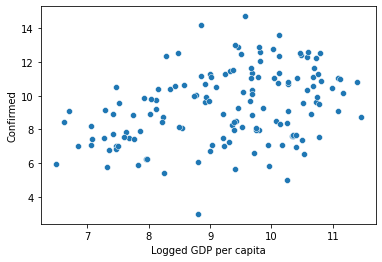

In [15]:
x= finaldata['Logged GDP per capita'] # correlation of GDP and confirmed covid-19
y= finaldata['Confirmed']
sns.scatterplot(x, np.log(y))

&lt;AxesSubplot:xlabel=&#39;Logged GDP per capita&#39;, ylabel=&#39;Confirmed&#39;&gt;

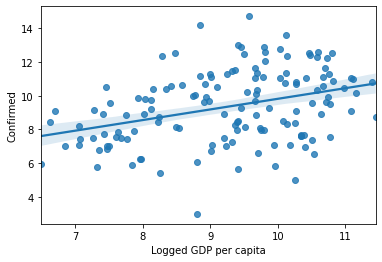

In [16]:
sns.regplot(x, np.log(y)) # regression plot: correlation of GDP and confirmed covid-19

&lt;AxesSubplot:xlabel=&#39;Social support&#39;, ylabel=&#39;Confirmed&#39;&gt;

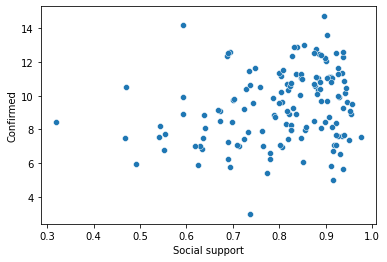

In [17]:
x= finaldata['Social support'] # correlation of Social support and confirmed covid-19
y= finaldata['Confirmed']
sns.scatterplot(x, np.log(y))

&lt;AxesSubplot:xlabel=&#39;Healthy life expectancy&#39;, ylabel=&#39;Confirmed&#39;&gt;

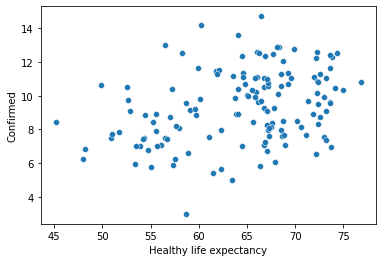

In [18]:
x= finaldata['Healthy life expectancy'] # correlation of Healthy life expectancy and confirmed covid-19
y= finaldata['Confirmed']
sns.scatterplot(x, np.log(y))